In [3]:
#Importing all necessary libraries for this model 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
import math

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix,classification_report

In [5]:
# Getting paths of training and testing image dataset in 2 variables

train_path = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train"
valid_path = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\val"

In [6]:
# ImageDataGenerator for training data with augmentation and validation split
train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)

# ImageDataGenerator for testing data with rescaling and augmentation
test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [7]:
# Creating a data generator for training data using train_datagen
train_gen = train_datagen.flow_from_directory(
                                train_path,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [8]:
# Creating a data generator for validation data using train_datagen
val_gen = train_datagen.flow_from_directory(
                                train_path,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [9]:
# Creating a data generator for test data using test_datagen
test_gen = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 984 images belonging to 10 classes.


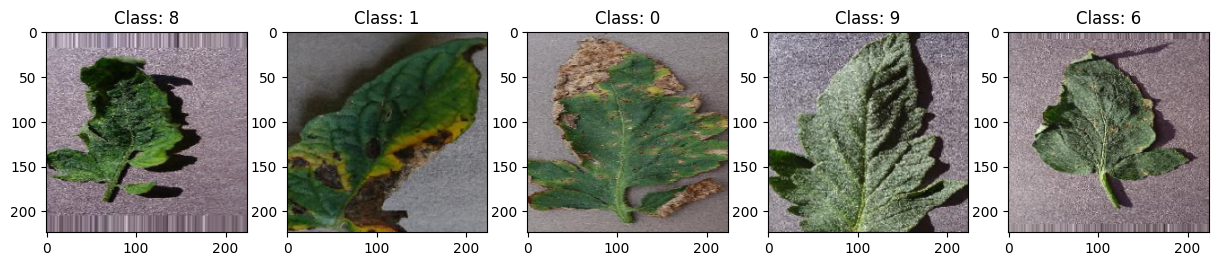

In [10]:
# Retrieve a batch of images and labels from the generator

batch_images, batch_labels = next(train_gen)

# Display the images along with their labels

num_images_to_display = 5 

plt.figure(figsize=(15, 8))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f"Class: {np.argmax(batch_labels[i])}") 

plt.show()


In [11]:
#CNN Model Layers:
cnn = models.Sequential([
    layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3]),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers. MaxPooling2D((2, 2)),
    layers.Conv2D (64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers. Conv2D (64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    # Output Layer
    layers.Dense(10,activation='softmax')
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [8]:
#Optimizing model at learning rate of 0.001
opt = keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
# Defining early stopping to prevent unnecessary epochs which results in model over-fitting
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 20, 
                   verbose = 1, 
                   restore_best_weights = True)

In [10]:
# Running model on Training dataset with 100 epochs
history = cnn.fit(x = train_gen,
                    callbacks = [es], 
                    steps_per_epoch = 7000/32,
                    epochs = 100,
                    validation_steps = 3000/32,
                    validation_data = val_gen) 

Epoch 1/100
218/218 [==============================] - 143s 616ms/step - loss: 1.9594 - accuracy: 0.2587 - val_loss: 1.6364 - val_accuracy: 0.3877
Epoch 2/100
218/218 [==============================] - 56s 256ms/step - loss: 1.3714 - accuracy: 0.4839 - val_loss: 1.1279 - val_accuracy: 0.5980
Epoch 3/100
218/218 [==============================] - 56s 256ms/step - loss: 1.0383 - accuracy: 0.6214 - val_loss: 1.0897 - val_accuracy: 0.5927
Epoch 4/100
218/218 [==============================] - 58s 265ms/step - loss: 0.8136 - accuracy: 0.7081 - val_loss: 0.7539 - val_accuracy: 0.7293
Epoch 5/100
218/218 [==============================] - 55s 251ms/step - loss: 0.6844 - accuracy: 0.7591 - val_loss: 0.6124 - val_accuracy: 0.7800
Epoch 6/100
218/218 [==============================] - 60s 272ms/step - loss: 0.5866 - accuracy: 0.7946 - val_loss: 0.4744 - val_accuracy: 0.8277
Epoch 7/100
218/218 [==============================] - 58s 266ms/step - loss: 0.4957 - accuracy: 0.8280 - val_loss: 0.5049 

Epoch 57/100
218/218 [==============================] - 55s 251ms/step - loss: 0.0782 - accuracy: 0.9731 - val_loss: 0.2113 - val_accuracy: 0.9350
Epoch 58/100
218/218 [==============================] - 55s 250ms/step - loss: 0.0742 - accuracy: 0.9737 - val_loss: 0.1585 - val_accuracy: 0.9503
Epoch 59/100
218/218 [==============================] - 54s 249ms/step - loss: 0.0916 - accuracy: 0.9694 - val_loss: 0.2160 - val_accuracy: 0.9377
Epoch 60/100
218/218 [==============================] - 54s 249ms/step - loss: 0.0560 - accuracy: 0.9796 - val_loss: 0.1270 - val_accuracy: 0.9623
Epoch 61/100
218/218 [==============================] - 55s 249ms/step - loss: 0.0771 - accuracy: 0.9731 - val_loss: 0.2425 - val_accuracy: 0.9317
Epoch 62/100
218/218 [==============================] - 55s 248ms/step - loss: 0.0795 - accuracy: 0.9744 - val_loss: 0.2380 - val_accuracy: 0.9330
Epoch 63/100
218/218 [==============================] - 55s 249ms/step - loss: 0.0504 - accuracy: 0.9826 - val_loss: 0

In [11]:
scores = cnn.evaluate(test_gen)

31/31 [==============================] - 12s 389ms/step - loss: 0.2011 - accuracy: 0.9451


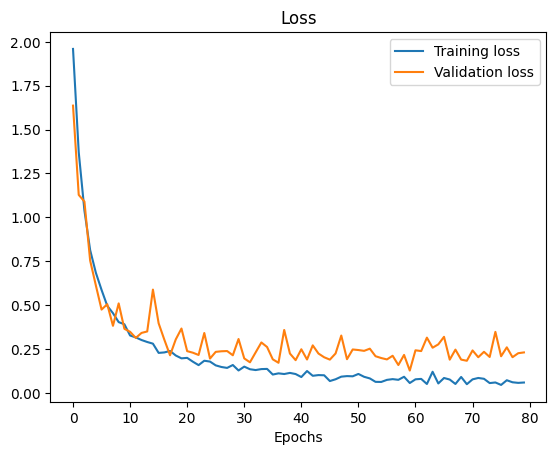

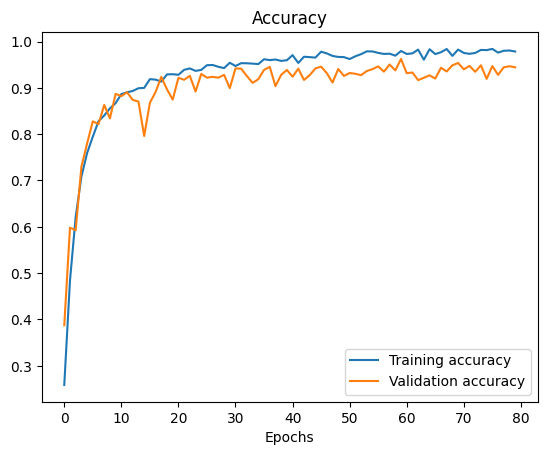

In [14]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [15]:
#Save model as cnn.h5 in local for future use
cnn.save('cnn.h5')

In [16]:
# Steps needed to iterate through entire dataset (math.ciel to make it a round number)
test_steps_per_epoch = math.ceil(test_gen.samples / test_gen.batch_size)
# Get predicted classes for Confusion Matrix
predictions = cnn.predict(test_gen, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions,axis=1)

31/31 [==============================] - 6s 179ms/step


In [12]:
# Save Actual Class Names in true_classes
true_classes = test_gen.classes
# Print Class names
class_labels = list(test_gen.class_indices.keys())
class_labels

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

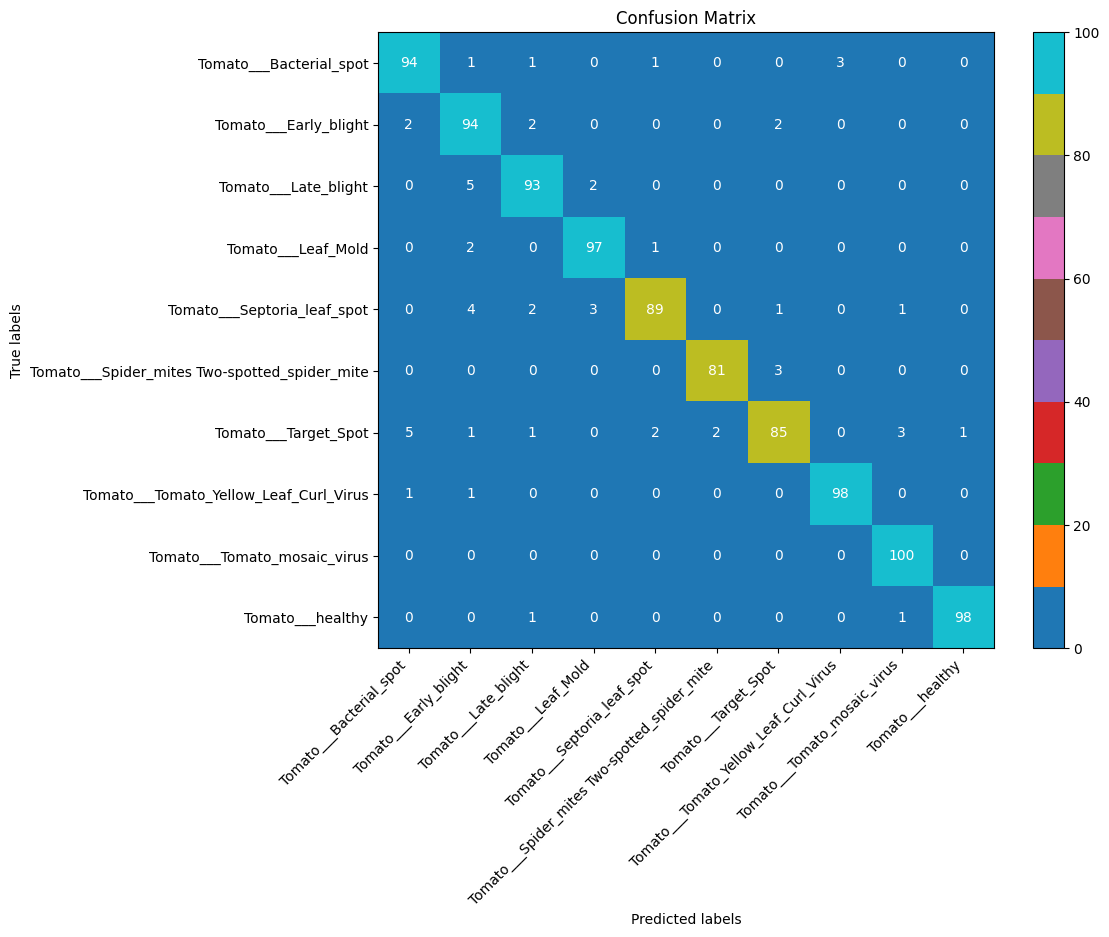

In [19]:
# Get the confusion matrix
conf_matrix = confusion_matrix(test_gen.classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.tab10)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45, ha='right')  # Rotate labels for better alignment
plt.yticks(tick_marks, class_labels)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')

plt.show()


In [20]:
# Generate Classification Report and Print 
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.92      0.94      0.93       100
                        Tomato___Early_blight       0.87      0.94      0.90       100
                         Tomato___Late_blight       0.93      0.93      0.93       100
                           Tomato___Leaf_Mold       0.95      0.97      0.96       100
                  Tomato___Septoria_leaf_spot       0.96      0.89      0.92       100
Tomato___Spider_mites Two-spotted_spider_mite       0.98      0.96      0.97        84
                         Tomato___Target_Spot       0.93      0.85      0.89       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.98      0.98       100
                 Tomato___Tomato_mosaic_virus       0.95      1.00      0.98       100
                             Tomato___healthy       0.99      0.98      0.98       100

                                     accu

1/1 [==============================] - 0s 82ms/step
Predicted Class Name : Tomato___Early_blight


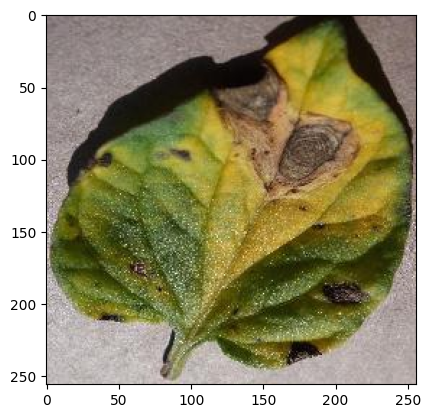

In [13]:
# Add path for the image you want to predict the disease
img_path="C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\101.JPG"

# Load the image and resize it to match input size defined as per the model
img = image.load_img(img_path, target_size=(224,224))

# Convert image into array 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalize pixel values in the range of 0 and 1
img_array /= 255.0

# Load the model saved on local into 'model'
model = tf.keras.models.load_model("C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\cnn.h5")

# Make predictions on Image and get index with highest predicted probability
pred = model.predict(img_array)
pred_index = np.argmax(pred)
pred_class = class_labels[pred_index]

# Print the Predictions along with the image
print(f"Predicted Class Name : {pred_class}")
plt.imshow(plt.imread(img_path))

In [14]:
predictions = cnn.predict(test_gen)

31/31 [==============================] - 13s 417ms/step


In [15]:
predicted_classes = np.argmax(predictions, axis=1)

In [16]:
true_classes = test_gen.classes


In [18]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)


Accuracy: 0.11483739837398374
